https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba

# Data Preparation.

In [1]:
import re 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
np.random.seed(3)

In [2]:
test_text = '''where are you?
is she in mexico?
i am in greece.
she is in mexico.
is she in england?
'''

train_text = '''are you still here?
where are you?
he is in mexico.
are you tired?
i am tired.
are you in england?
were you in mexico?
is he in greece?
were you in england?
are you in mexico?
i am in mexico.
are you still in mexico? 
are you in greece again?
she is in england.
he is tired.
'''

In [3]:
def tokenise(s):
    return [i for i in re.sub('([.?])', ' \g<1>', s).strip().split(' ') if i]

In [4]:
def one_hot(y, classes):
    onehot = np.zeros((len(y), classes)) # creates matrix of ? rows, ? columns 
    
    # Iterate through y and update onehot's column to 1 based on the class
    # y [0, 1, 4, 3, 2]
    for i, v in enumerate(y):
        onehot[i][v] = 1
    return onehot

In [5]:
vocab = list(set([token for token in re.sub('([.?])', ' \g<1>', train_text)
             .replace(' ', '\n').strip().split('\n') if token]))
vocab += ['<BOS>', '<EOS>', '<PAD>']
vocab.sort()

In [6]:
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

In [7]:
pad = max([len(tokenise(i)) for i in train_text.split('\n')]) + 1
train_sentences = []
for line in train_text.strip().split('\n'):
        tokens = tokenise(line)
        padded = ['<BOS>'] + tokens + ['<EOS>'] + ['<PAD>'] * (pad - len(tokens))
        train_sentences.append([word2idx[token] for token in padded])

In [8]:
x = []
y = []
for sentence in train_sentences:
    for i in range(pad - 2):
            x.append([sentence[i], sentence[i+1]])
            y.append(sentence[i+2])
X = np.array(x)
Y = np.array(y)
Yo = one_hot(Y, len(vocab))

In [9]:
test_sentences = []
for line in test_text.strip().split('\n'):
        tokens = tokenise(line)
        padded = ['<BOS>'] + tokens + ['<EOS>'] + ['<PAD>'] * (pad - len(tokens))
        test_sentences.append([word2idx[token] for token in padded])

In [10]:
x_test = []
y_test = []
for sentence in test_sentences:
    for i in range(pad - 2):
            x_test.append([sentence[i], sentence[i+1]])
            y_test.append(sentence[i+2])
X_test = np.array(x_test)
Y_test = np.array(y_test)
Yo_test = one_hot(Y_test, len(vocab))

# Algorithm for Feed Forward Network.

In [11]:
h = np.random.randn(2, 6) 
b = np.random.randn(6)
O = np.random.randn(6, len(vocab)) 

In [12]:
def calc_z(x,w,b):
    return np.matmul(x,w) + b

In [13]:
def calc_output(a,w):
    return np.matmul(a,w)

In [14]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [15]:
def relu(z):
    return np.maximum(np.zeros([z.shape[0], z.shape[1]]), z)

In [16]:
def softmax(z):
    z1 = z - np.max(z, axis=-1, keepdims=True)
#     z1 = z - max(z)
    numerator = np.exp(z1)
    denomintaor = np.sum(numerator)
    softmax = numerator/denomintaor
    
    return softmax
#     return (np.exp(z).T / np.sum(np.exp(z),axis=1)).T

In [17]:
def feed_forward_step(x,h,b,O):
    
    Z1 = calc_z(x,h,b)
#     A1 = relu(Z1)
    A1 = sigmoid(Z1)
    Z2 = calc_output(A1,O)
    Y_hat = softmax(Z2)
    
    return Y_hat, A1

In [18]:
def cross_entropy(y, y_hat):
    return y * np.log(y_hat)

In [19]:
def cost_func(y, y_hat):
    ce = cross_entropy(y, y_hat)
    return - np.mean(ce)

In [20]:
def accuracy(y, Y_hat):
    predicted = np.argmax(Y_hat, axis = 1)
    acc = 0
    for yi, y_hati in zip(y, predicted):
        if yi == y_hati:
            acc += 1
            
    return (acc/y.shape[0])*100

In [21]:
def feed_forward_network(X, h, b, O, Yo, Y, lr, epochs):
    
    cost_list = []
    acc_list = []
    
    for i in range(epochs):
        Y_hat, A1 = feed_forward_step(X,h,b,O)
        cost = cost_func(Yo, Y_hat)
        
        gradient_z2 = Y_hat - Yo
        gradient_O = (gradient_z2.T @ A1).T
        gradient_sigmoid = A1 * (1-A1) ## 75 X 6  
#         gradient_relu = binarize(A1)
        gradient_h = (((gradient_z2)@O.T * gradient_sigmoid).T @ X).T   
        gradient_b = np.sum((gradient_z2)@O.T * gradient_sigmoid, axis = 0)
#         gradient_O = ((Y_hat - Yo).T @ A1).T
    
        # gradient update
    
        h -= lr*gradient_h
        b -= lr*gradient_b
        O -= lr*gradient_O
        
        cost_list.append(cost)
        
#     Y_hat, A1 = feed_forward_step(X,h,b,O)
    
    return cost_list, h, b ,O
    

In [22]:
lr = 0.001
epochs = 50

In [23]:
cost_list, h, b , O = feed_forward_network(X, h, b, O, Yo, Y, lr, epochs)

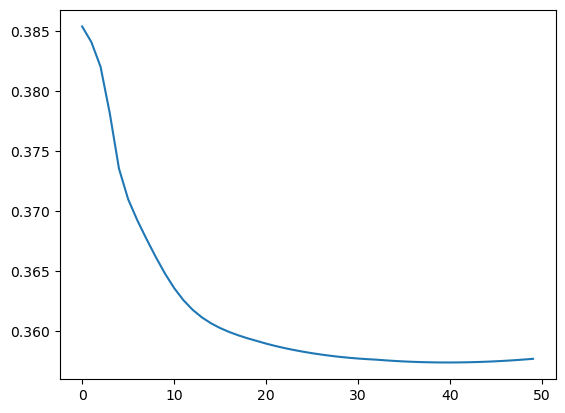

In [24]:
plt.plot(cost_list)
plt.show()

## Testing

In [25]:
Y_hat_test, A1_test = feed_forward_step(X_test,h,b,O)

In [26]:
Y__, A__ = feed_forward_step([6, 13], h, b, O)

In [27]:
Y__

array([1.51810098e-02, 6.01094568e-03, 2.67586974e-03, 6.02084267e-02,
       2.89985782e-01, 1.97800106e-03, 7.82089757e-03, 1.48602110e-02,
       4.25271364e-03, 4.19447018e-02, 1.71578505e-03, 6.42546731e-03,
       8.94311181e-03, 3.95951290e-01, 5.56141609e-03, 3.09414657e-02,
       3.64528000e-04, 6.43496082e-03, 1.56307375e-03, 2.57848342e-03,
       8.35160990e-02, 1.10857603e-02])

In [28]:
idx2word[np.argmax(Y__)]

'in'

In [29]:
np.argmax(Y_hat_test, axis = 1)

array([17, 13, 13, 13, 13,  3, 13, 13, 13, 13,  3, 13, 13, 13, 13, 17, 13,
       13, 13, 13,  3, 13, 13, 13, 13])

In [30]:
word2idx

{'.': 0,
 '<BOS>': 1,
 '<EOS>': 2,
 '<PAD>': 3,
 '?': 4,
 'again': 5,
 'am': 6,
 'are': 7,
 'england': 8,
 'greece': 9,
 'he': 10,
 'here': 11,
 'i': 12,
 'in': 13,
 'is': 14,
 'mexico': 15,
 'she': 16,
 'still': 17,
 'tired': 18,
 'were': 19,
 'where': 20,
 'you': 21}

In [31]:
Y_test

array([ 7, 21,  4,  2,  3, 16, 13, 15,  4,  2,  6, 13,  9,  0,  2, 14, 13,
       15,  0,  2, 16, 13,  8,  4,  2])

In [32]:
Y_hat, A1 = feed_forward_step(X,h,b,O)

In [33]:
np.argmax(Y_hat, axis = 1)

array([ 4, 13, 13, 13, 13, 17, 13, 13, 13, 13,  3, 13, 13, 13, 13,  4, 13,
       13, 13, 13,  3, 13, 13, 13, 13,  4, 13, 13, 13, 13, 17, 13, 13, 13,
       13,  3, 13, 13, 13, 13, 17, 13, 13, 13, 13,  4, 13, 13, 13, 13,  3,
       13, 13, 13, 13,  4, 13, 13, 13, 13,  4, 13, 13, 13, 13, 17, 13, 13,
       13, 13,  3, 13, 13, 13, 13])